In [69]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv('./data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [71]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target and position features (Long/Lat). Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target and positional values.

In [72]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)

# Features that do not affect the price
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

# Features that had 2/3 of missing data. Data filling methods at this point are useless
data.drop(['YearBuilt', 'BuildingArea'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


Filling th rest of the missing data with:
- median value (numerical features)
- "forward fill" (categorical features)

In [73]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].median())

cat_data = data[cat_feat]
num_data = data[num_feat]

/tmp/ipykernel_15920/1205132683.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


In [74]:
data.isna().sum(axis=0)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Data preprocessing

Target distribution skew:  2.472900878148523


(array([1.4109e+04, 5.8390e+03, 8.2400e+02, 1.5400e+02, 4.8000e+01,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

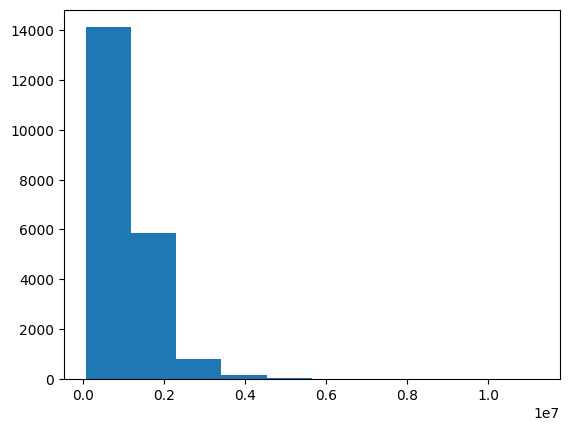

In [75]:
import matplotlib.pyplot as plt

print("Target distribution skew: ", data["Price"].skew())
plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range (including other numerical features).

In [76]:
from scipy import stats

data = num_data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
target = data["Price"]
data.drop(columns=["Price"], inplace=True)
print("Target distribution skew: ", target.skew())

Target distribution skew:  1.1397110452643313


/tmp/ipykernel_15920/325988847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Price"], inplace=True)


In [77]:
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,2.5,2.0,1.0,1.0,202.0,-37.79960,144.99840,4019.0
1,2,2.5,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0
2,3,2.5,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0
3,3,2.5,3.0,2.0,1.0,94.0,-37.79690,144.99690,4019.0
4,4,2.5,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...
20988,3,6.3,3.0,1.0,2.0,288.0,-37.81095,144.88516,6543.0
20989,4,6.3,4.0,1.0,3.0,593.0,-37.81053,144.88467,6543.0
20990,2,6.3,2.0,2.0,1.0,98.0,-37.81551,144.88826,6543.0
20991,2,6.3,2.0,1.0,2.0,220.0,-37.82286,144.87856,6543.0


In [78]:
geo_features = ['Longtitude', 'Lattitude']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

/tmp/ipykernel_15920/2799774898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(geo_features, axis=1, inplace=True)


## Spatial data analysis

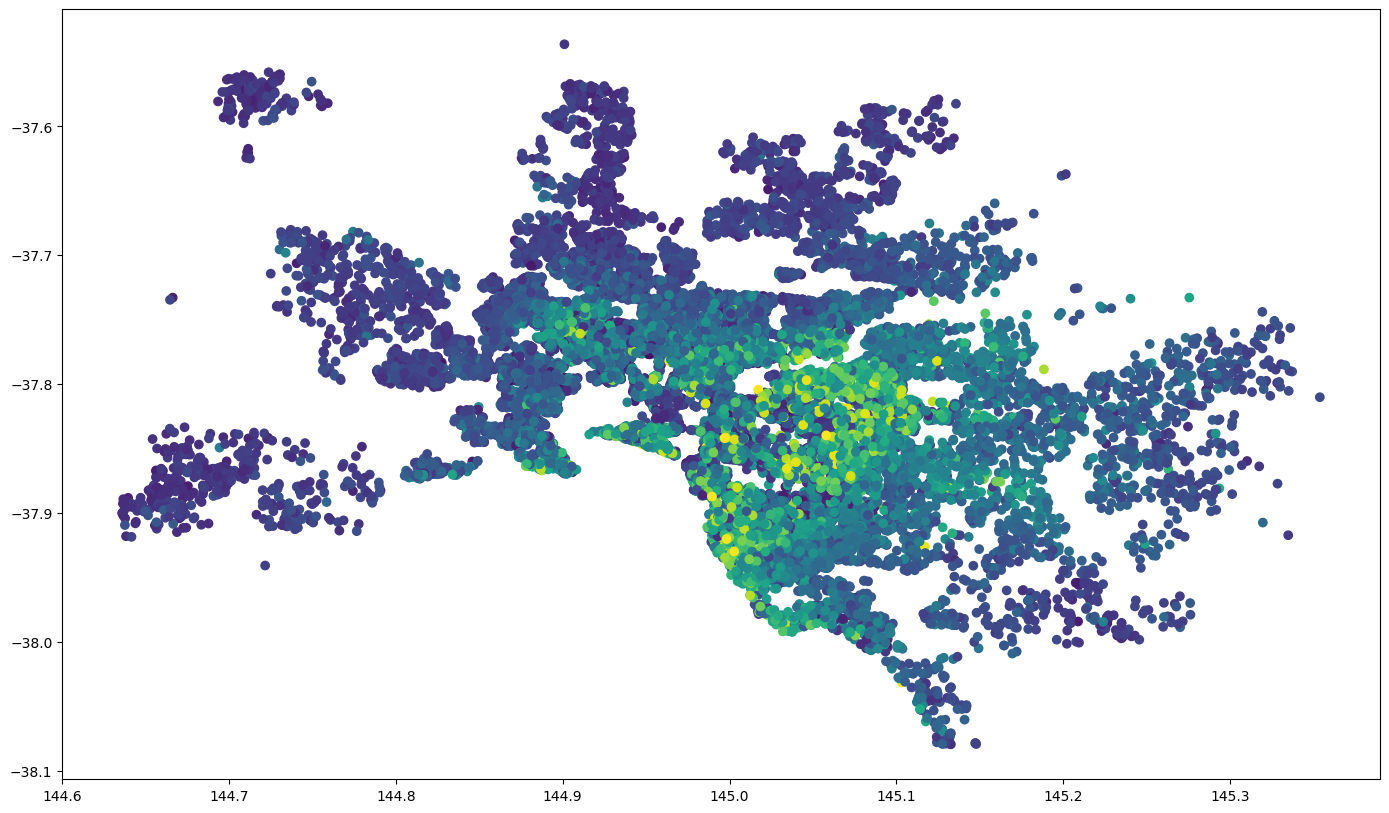

In [79]:
plt.figure(figsize=(17, 10))
plt.scatter(position_data["Longtitude"], position_data["Lattitude"], c=target)

In [80]:
import sklearn.cluster as cls

kmeans = cls.KMeans(10, max_iter=1)
kmeans.fit(
    np.hstack((
        position_data.to_numpy(),
        # data["Price"].to_numpy().reshape((-1, 1)),
    ))
)

KMeans(max_iter=1, n_clusters=10)

In [81]:
kmeans.cluster_centers_

array([[144.96544351, -37.77721678],
       [145.14867236, -37.94125248],
       [145.06655533, -37.82244995],
       [144.7714137 , -37.69319234],
       [145.07270893, -37.68569745],
       [145.03018428, -37.91309587],
       [144.79547117, -37.86276789],
       [145.23085622, -37.82180974],
       [144.92093707, -37.67308573],
       [144.86778961, -37.77865606]])

Minimizing `SPATIAL variance`

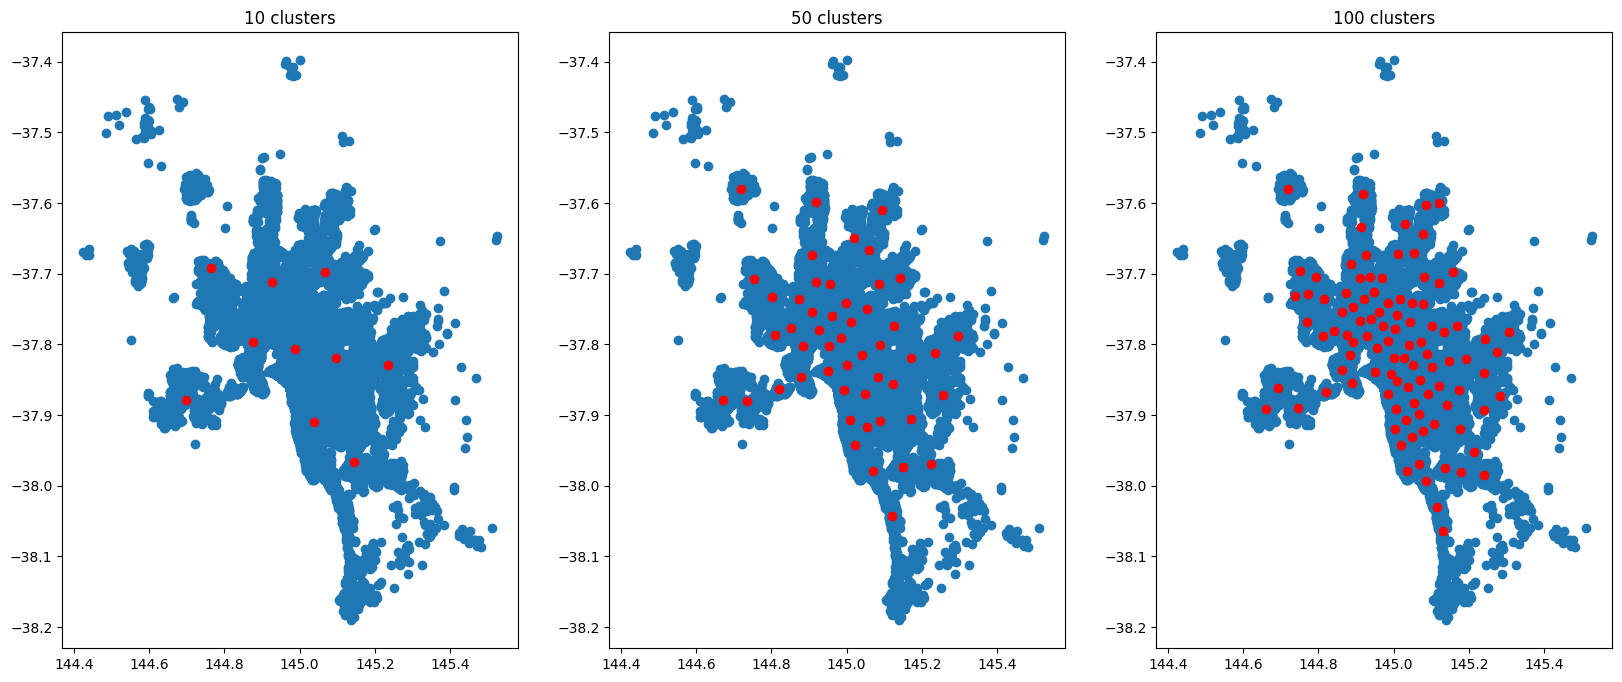

In [82]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 8)

for i, N in enumerate([10, 50, 100]):
    kmeans = cls.KMeans(n_clusters=N, max_iter=1000, random_state=42, init="k-means++")
    kmeans.fit(position_data.to_numpy())

    axs[i].set_title(f"{N} clusters")
    axs[i].scatter(num_data["Longtitude"], num_data["Lattitude"])
    axs[i].scatter(
        *kmeans.cluster_centers_[:, :2].T,
        c="red",
        # marker="+",
    )

Minimizing `SPATIAL + TARGET variance` 

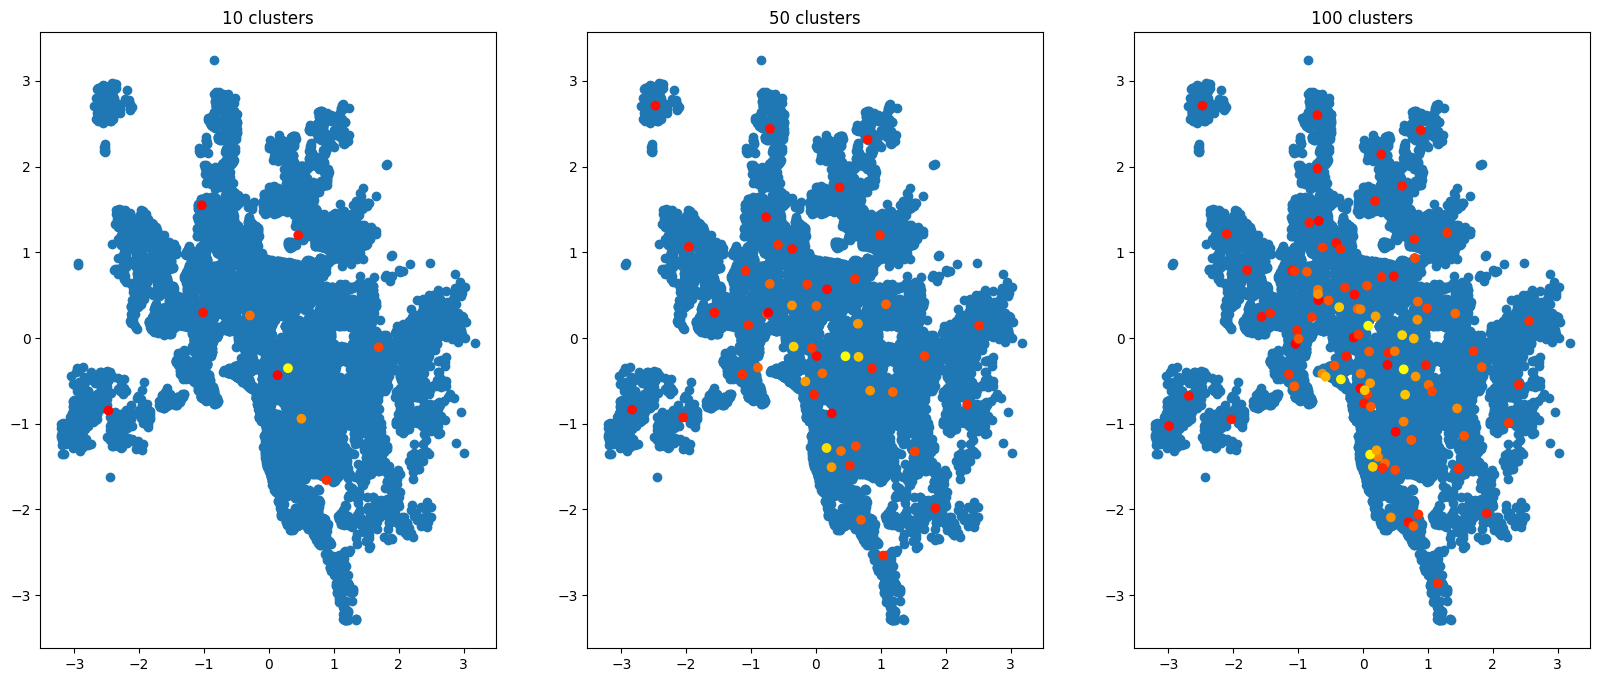

In [83]:
from sklearn.preprocessing import scale, minmax_scale

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 8)

scaled_spatial = scale(position_data)
scaled_target = scale(target.to_numpy().reshape((-1, 1)))

for i, N in enumerate([10, 50, 100]):
    kmeans = cls.KMeans(n_clusters=N, max_iter=1000, random_state=42, init="k-means++")
    kmeans.fit(np.hstack((scaled_spatial, scaled_target,)))

    axs[i].set_title(f"{N} clusters")
    axs[i].scatter(*scaled_spatial.T)
    axs[i].scatter(
        *kmeans.cluster_centers_[:, :2].T,
        c=kmeans.cluster_centers_[:, 2],
        cmap="autumn",
        # marker="+"
    )

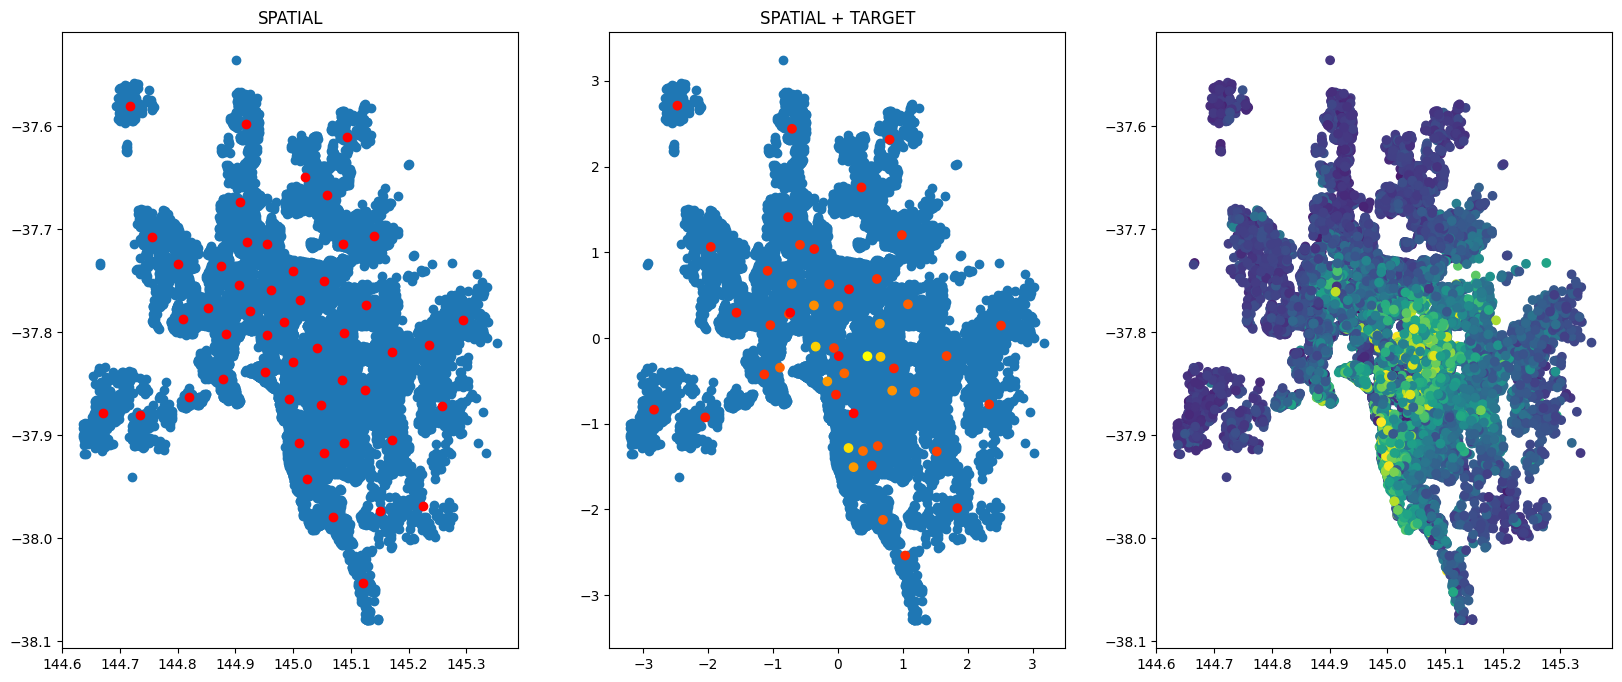

In [84]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 8)

scaled_spatial = scale(position_data)
scaled_target = scale(target.to_numpy().reshape((-1, 1)))
kmeans = cls.KMeans(n_clusters=50, max_iter=1000, random_state=42, init="k-means++")

kmeans.fit(position_data.to_numpy())
axs[0].set_title("SPATIAL")
axs[0].scatter(position_data["Longtitude"], position_data["Lattitude"])
axs[0].scatter(
    *kmeans.cluster_centers_[:, :2].T,
    c="red",
)

kmeans.fit(np.hstack((scaled_spatial, scaled_target,)))
axs[1].set_title("SPATIAL + TARGET")
axs[1].scatter(*scaled_spatial.T)
axs[1].scatter(
    *kmeans.cluster_centers_[:, :2].T,
    c=kmeans.cluster_centers_[:, 2],
    cmap="autumn",
)

axs[2].scatter(position_data["Longtitude"], position_data["Lattitude"], c=target)

## SOMs

In [85]:
from typing import Callable
from minisom import MiniSom
from matplotlib.pyplot import Axes

In [86]:
GRID_SIZE = (50, 50)

def plot_som(
    ax: Axes,
    data: np.ndarray,
    target: np.ndarray,
    neigh_func: str,
    *,
    activation: str | Callable = "euclidean",
):
    som = MiniSom(
        *GRID_SIZE,
        input_len=data.shape[1],
        neighborhood_function=neigh_func,
        sigma=1.5,
        random_seed=13,
        activation_distance=activation,
    )

    som.random_weights_init(data)
    som.train_random(data, 10_000, verbose=True)

    price_map = som.labels_map(data, target / target.sum())
    cm = plt.cm.autumn

    for node, prices in price_map.items():
        price_values = list(prices)

        x = node[0] + .1
        y = node[1] - .3

        for i, p in enumerate(price_values):
            off_set = (i+1)/len(price_values) - 0.05
            ax.text(x, y+off_set, "+", color=cm(p), fontsize=10)

    ax.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
    ax.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.06928272783043087


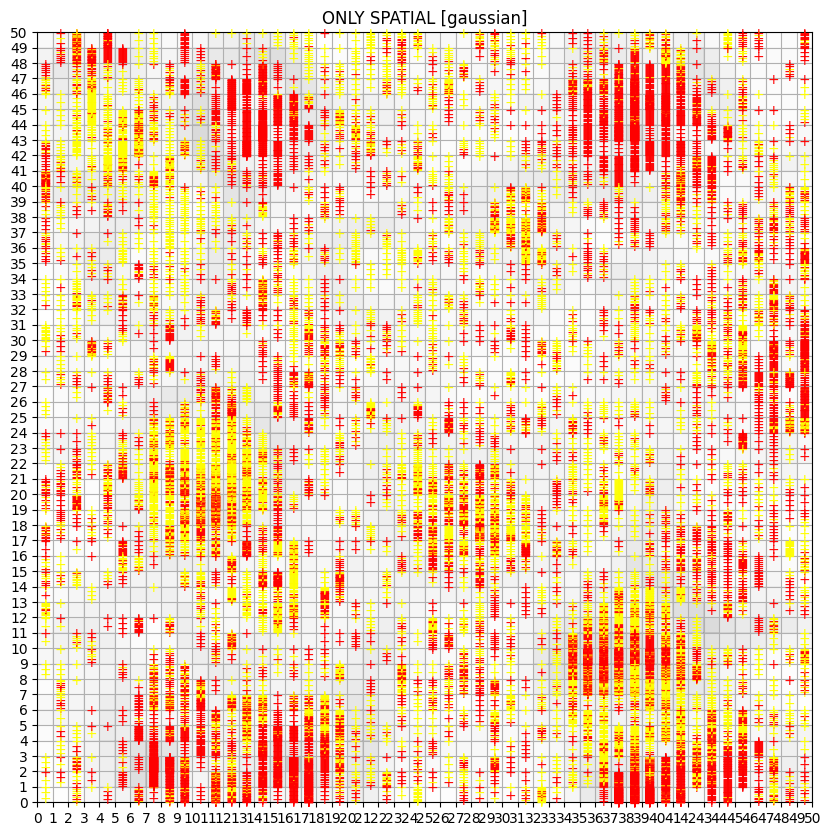

In [87]:
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(GRID_SIZE[0] + 1))
plt.yticks(np.arange(GRID_SIZE[1] + 1))
plt.title("ONLY SPATIAL" + " [gaussian]")

som_data = np.hstack( (scaled_spatial,) )
plot_som(plt, som_data, scaled_target.flatten(), "gaussian")
plt.show()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.16389380568146786


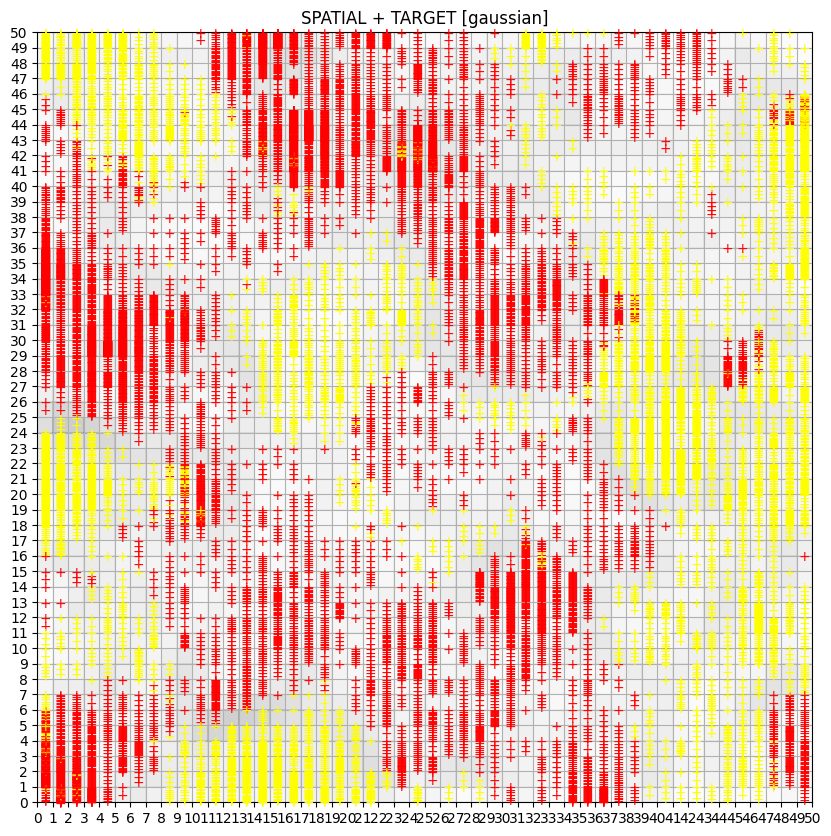

In [88]:
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(GRID_SIZE[0] + 1))
plt.yticks(np.arange(GRID_SIZE[1] + 1))
plt.title("SPATIAL + TARGET" + " [gaussian]")

spatial_with_target = np.hstack( (scaled_spatial, scaled_target) )
plot_som(plt, spatial_with_target, spatial_with_target[:, 2], "gaussian")
plt.show()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.33897229271188667


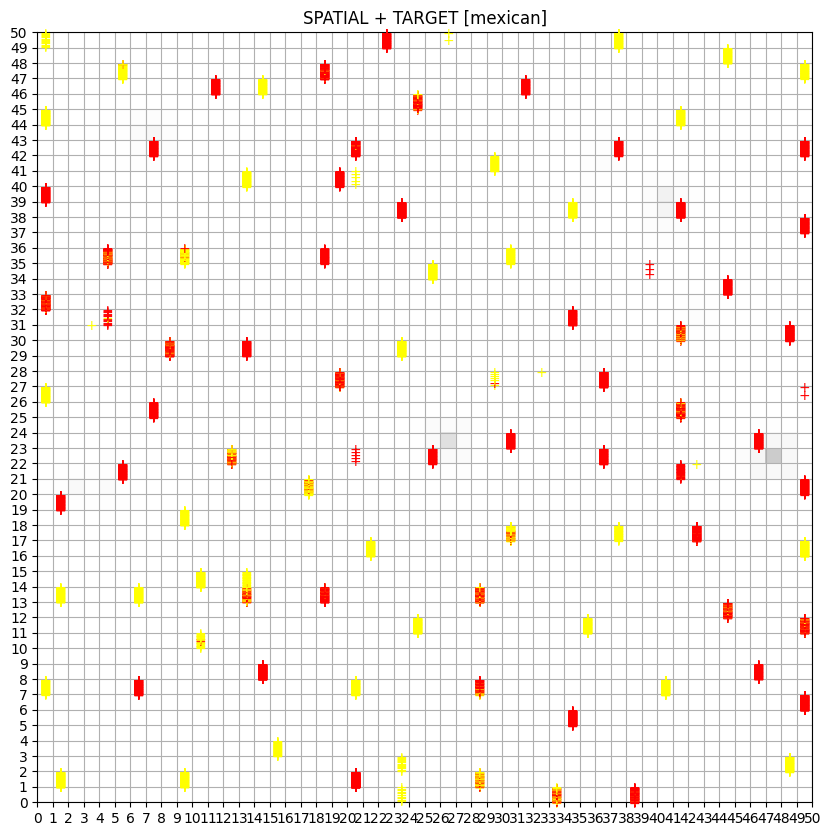

In [89]:
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(GRID_SIZE[0] + 1))
plt.yticks(np.arange(GRID_SIZE[1] + 1))
plt.title("SPATIAL + TARGET" + " [mexican]")

plot_som(plt, spatial_with_target, spatial_with_target[:, 2], "mexican_hat")
plt.show()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.43709203893839654


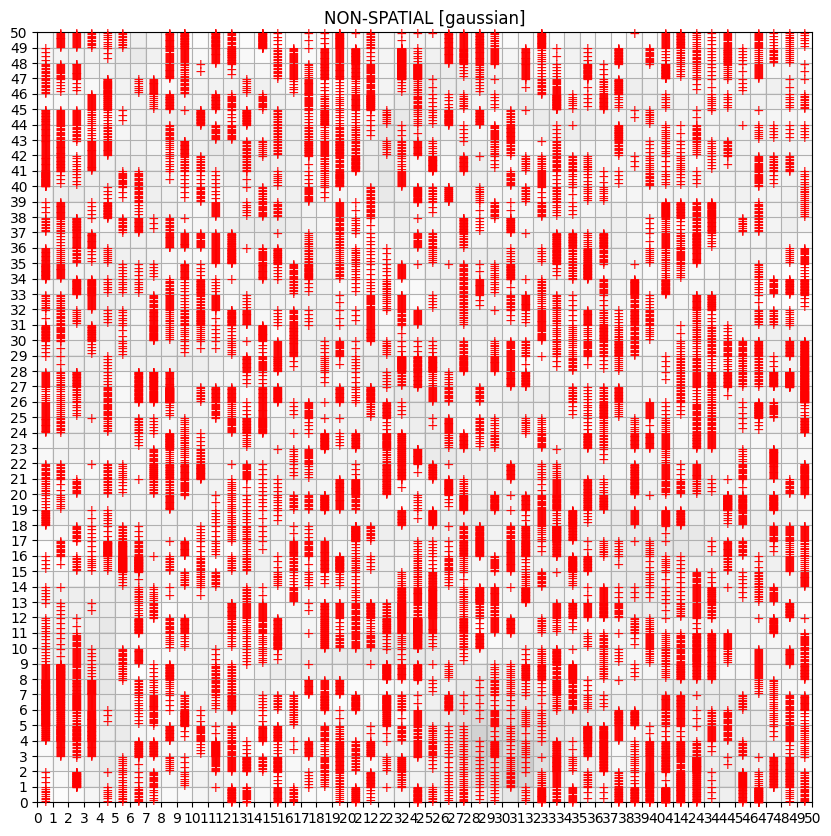

In [90]:
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(GRID_SIZE[0] + 1))
plt.yticks(np.arange(GRID_SIZE[1] + 1))
plt.title("NON-SPATIAL" + " [gaussian]")

som_data = scale(data)
plot_som(plt, som_data, target, "gaussian")
plt.show()

`Custom activation distance`

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.17253986903694443
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.16382044535964027
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15870838231391363


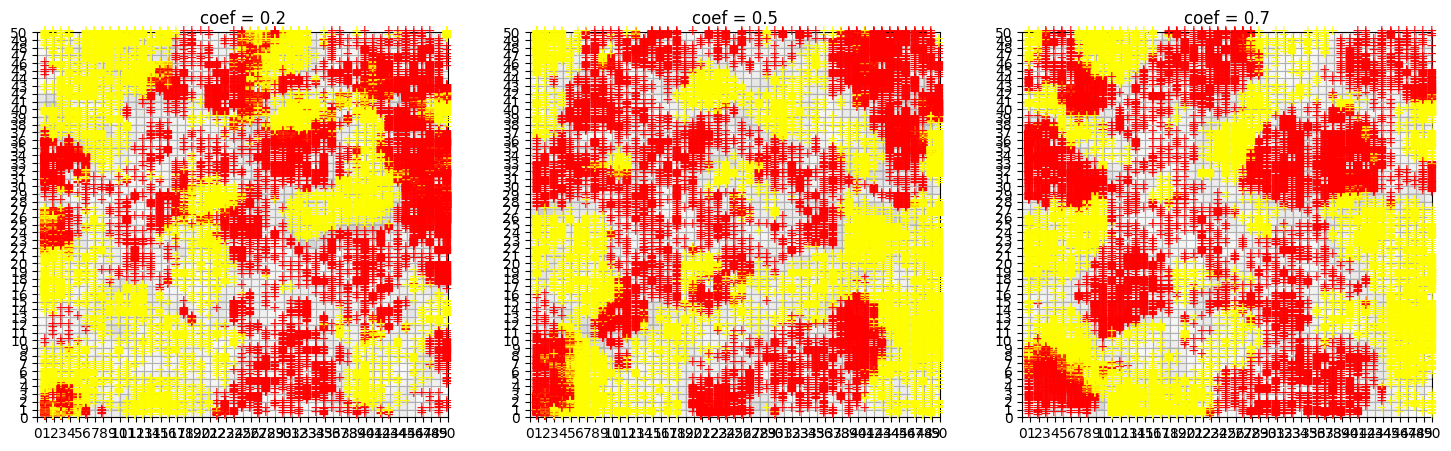

In [94]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

for i, taret_coef in enumerate([0.2, 0.5, 0.7]):
    def tmp(x: np.ndarray, y:np.ndarray) -> float:
        diff = np.subtract(x, y)
        diff[:, :, -1] *= taret_coef

        return np.linalg.norm(diff, axis=-1)

    axs[i].set_xticks(np.arange(GRID_SIZE[0] + 1))
    axs[i].set_yticks(np.arange(GRID_SIZE[1] + 1))
    axs[i].set_title(f"coef = {taret_coef!r}")

    plot_som(
        axs[i],
        spatial_with_target,
        spatial_with_target[:, 2],
        "gaussian",
        activation=tmp,
    )

plt.show()